In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
brown = nltk.corpus.brown

In [3]:
cfd1 = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = brown.categories()[:5]
modals = ['can','could','will','would','may','might']
cfd1.tabulate(conditions=genres,samples=modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [4]:
# genre별로 modal 의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for modal in modals
    for word in brown.words(categories=genre)
        if word.lower() ==modal
)

cfd2.tabulate()

                  Can Could   May Might  Will Would   can could   may might  will would 
      adventure     2     3     2     1     1     3    46   151     5    58    50   191 
 belles_lettres     3     3    14     0    10     5   246   213   207   113   236   392 
      editorial     3     1     5     0     2     5   121    56    74    39   233   180 
        fiction     2     2     2     0     4     4    37   166     8    44    52   287 
     government     2     0    26     0     0     0   117    38   153    13   244   120 
        hobbies     8     1    12     0     5     5   268    58   131    22   264    78 
          humor     1     3     0     0     0     0    16    30     8     8    13    56 
        learned     2     0    12     0     0     2   365   159   324   128   340   319 
           lore     0     1     5     1     3     2   170   141   165    49   175   186 
        mystery     3     4     2     0     5     3    42   141    13    57    20   186 
           news     1

In [5]:
import matplotlib
import matplotlib.pyplot as plt

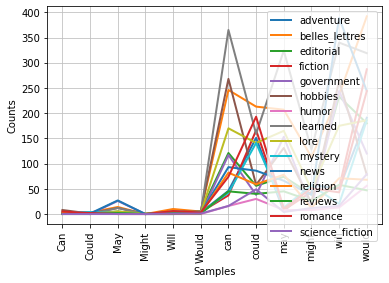

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
cfd2.plot()

### figsize의 의미?
- figsize : (width, height)

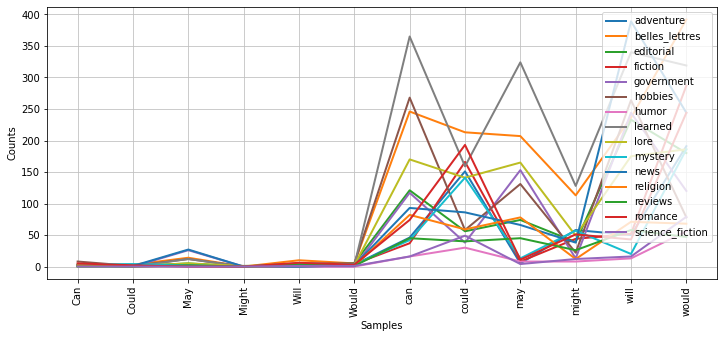

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
plt.figure(figsize=(12,5))
cfd2.plot()

### Inagural


- 연설문 데이터

In [8]:
inaugural = nltk.corpus.inaugural

In [9]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

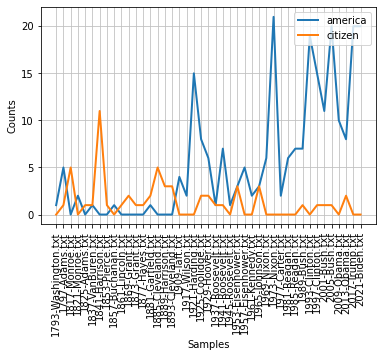

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
#inaugural 에서 america, citizen의 빈도수, 연도별로

# cfd1 = nltk.ConditionalFreqDist(
#     (target_word,fileid)
#     for target_word in ['citizen','america']
#     for word in inaugural.words(categories=fileid)
#         if word.lower() ==target_word
#     for fileid in inaugural.fileids()
# )

cfd2 = nltk.ConditionalFreqDist(
    (target_word,fileid)
    for fileid in inaugural.fileids()
    for target_word in ['citizen','america']
    for word in inaugural.words(fileid)
        if word.lower() ==target_word
)

cfd2.plot()

### Tuple & List

1. 생성하기

In [11]:
emptyT = ()
emptyT = tuple()
emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

1.1 요소가 두개 이상일 때의 생성 방법

In [12]:
listA = ['a','b']
tupleA = 'a','b' #더 많이 씀
tupleA = ('a','b')

1.2. 요소가 1개일 때의 생성 방법

In [13]:
listA = ['a']
tupleA = ('a',) #콤마가 붙어야 함
tupleA  = 'a',

In [14]:
# 콤마가 없다면? -> 문자열로 인식됨
tupleA = ('a')
print(type(tupleA))

<class 'str'>


2. 여러 변수 할당하기

- packing : 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a = [1,2,3,4]
- unpacking : 여러 변수에 하나의 데이터를 할당하고 각각의 변수로 변환하는 것
    - a,b,c = [1,2,3]

In [15]:
name = 'lee'
a,b,c = name
a,b,c #unpacking

('l', 'e', 'e')

#### 언패킹 시에 길이가 다르다면?
- 변수의 수가 더 많은 경우의 에러 메시지 : not enough values to unpack (expected 4, got 3)
- 변수의 수가 더 적은 경우의 에러 메시지 : too many values to unpack (expected 2)

In [16]:
name = 'lee'
a,b = 'lee'
a,b

ValueError: too many values to unpack (expected 2)

In [ ]:
#변수의 수가 더 많은 경우
name = 'lee'
a,b,c,d = name
a,b,c,d

ValueError: not enough values to unpack (expected 4, got 3)

In [18]:
# 교환
pwd = 'abcd'
userId = 'hello'

#pwd = hello,userId를 abcd 로
tmp = pwd
pwd = userId
userId = tmp

pwd,userId = userId,pwd #더 간단하게 튜플 이용해서 교환 가능..

### 3. 연산

- 리스트도 동일함

In [19]:
('a',) + ('b','c') #한개니까 , 점!
('a','b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [20]:
a = 1,2
b = 1,3
a,b

((1, 2), (1, 3))

4. 순회하기

In [21]:
a = 1,2,3,4,5
for i in a:
    print(i)

1
2
3
4
5


5. list comprehension
- tuple comprehension? (x)
- 그러나 순회하는 대상이 튜플이 될 수는 있다
- 혹은 결과를 튜플로 감쌀 수 있다.

In [22]:
#1. 
tuple([word for word in a])

#2. 느림
*[word for word in a],

(1, 2, 3, 4, 5)

In [23]:
tupleA = (1,2,3)
[word for word in tupleA] #순회의 대상

[1, 2, 3]

6. 튜플은 불변객체이다.
- a = 1,2,3,4
- 코드 수정할 때 튜플 수정할 수 없도록
- 메모리 사용이 적다 

In [24]:
a = (1,)+(1,2,3) #변한 것 아닐까?
b = (1,2,3)
id(a), id(a+b) #변한 것이 아니라 새로운 객체를 만든 것과 같음.

(5342174464, 5342528608)

7. 형변환
- tuple()
- ()

In [25]:
tuple('cat'),('cat') #다르다!

(('c', 'a', 't'), 'cat')

In [26]:
list('cat'),['cat'] #다르다!

(['c', 'a', 't'], ['cat'])

In [27]:
b[0]

1

- 튜플의 장점 :
    - 타인이 변경하는 것을 막을 수 있다.
    - 메모리 사용이 적다
- 리스트 장점 : 
    - 데이터 순차적으로 파악하기 좋다.
     - 중복되는 데이터를 포함할 수 있다.

### List 관련 함수

1. 항목 변경하기

In [28]:
days = ['월','화','수','목']
days.append('fri') #마지막에 요소 추가

In [29]:
days

['월', '화', '수', '목', 'fri']

In [30]:
days.insert(2,3)

In [31]:
days

['월', '화', 3, '수', '목', 'fri']

In [32]:
#병합하기
listA = ['토','일']
days.extend(listA)
days

['월', '화', 3, '수', '목', 'fri', '토', '일']

In [33]:
days.append(listA)
days

['월', '화', 3, '수', '목', 'fri', '토', '일', ['토', '일']]

In [34]:
days+=listA
days

['월', '화', 3, '수', '목', 'fri', '토', '일', ['토', '일'], '토', '일']

In [35]:
days[-3] = '공휴일'
days

['월', '화', 3, '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [36]:
days[:3] = 1,2 #개수 안맞아도 상관 없음. 
days

[1, 2, '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [37]:
days[:3] = 'cat'
days

['c', 'a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [38]:
#a = 1,2,3,4,5
a = list(range(1,6))

삭제하기

In [39]:
#1. offset
del days[0] #자리가 보존되지 않고 삭제된다.
days

['a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [40]:
#2. 특정한 값 삭제
days.remove('a')
days

['t', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [41]:
#3. pop(index) 맨 마지막 요소 삭제해준다
days.pop() #뭐가 삭제되었는지 알려줌

'일'

In [42]:
#전부 삭제
days.clear()
days

[]

값 찾기

In [43]:
a = list(range(5))
a.index(2)

2

In [44]:
3 in a

True

### 정렬하기
- sort(reverse)
- sorted(reverse) : 정렬된 복사본을 반환 / 기존 값은 유지
- 리스트.reverse()

In [45]:
a = sorted(a,reverse=True) #할당해야
a

[4, 3, 2, 1, 0]

In [46]:
a.sort() #할당하지 않아도
a

[0, 1, 2, 3, 4]

In [47]:
a.reverse()

In [48]:
a

[4, 3, 2, 1, 0]

In [49]:
c = list(reversed(a))
c

[0, 1, 2, 3, 4]

## 할당하기
- = 으로 할당할 때에는 하나가 변하면 같이 변함. 메모리 주소를 참조해서
- shallow copy 
    - a가 변해도 b가 변하지 않도록 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
    - `가변객체가 들어가는 경우에는` : shallow copy가 되지 않는다.
- deep copy

In [50]:
a = [0,1,2,3,4]

In [51]:
b = a # 같은 메모리 주소를 참조함
b[0] = 7
b

[7, 1, 2, 3, 4]

In [52]:

a #a도 바뀌어버렸다.

[7, 1, 2, 3, 4]

In [53]:
id(a),id(b) #같은 메모리 참조

(5328267840, 5328267840)

In [54]:
a = [1,2,3]
b = a.copy()
b[0] = 2
a #a는 바뀌지 않음

[1, 2, 3]

In [55]:
b = a.copy()
c = list(a) #list 로 감싸서 새로운 객체로 선언
d = a[:] #전체 복사 가능
id(a),id(b),id(c),id(d) #주소 다 다름!

(5341365376, 5341364544, 5342191872, 5328945920)

In [56]:
a.append([6,7,8])
a

[1, 2, 3, [6, 7, 8]]

In [57]:
e = a.copy() #shallow copy
e
id(a),id(e) #주소도 다름

(5341365376, 5329609408)

In [58]:
print(e)
a[-1][0] = 0 #shallow copy 했기 때문에 바뀌지 않아야 하는데 같이 바뀌어버림.
#가변객체가 들어가면 바뀌어버림. 
e

[1, 2, 3, [6, 7, 8]]


[1, 2, 3, [0, 7, 8]]

### 가변객체여도 변하지 않게 하고 싶다면 deep copy 이용

In [59]:
import copy
f = copy.deepcopy(a)
f

[1, 2, 3, [0, 7, 8]]

In [60]:
f[-1][-1] = 9
a,f #a는 변하지 않음 f는 변함.

([1, 2, 3, [0, 7, 8]], [1, 2, 3, [0, 7, 9]])

#### 순회하기
- zip() : 리스트 여러개 동시순회
- enumerate() : 인덱스도 함께 돌고자 할 때(list와 range를 같이 도는 것처럼)
- range()

In [61]:
a = [1,2,3]
b = ['mon','tue','wed','thu']

for itemA,itemB in zip(a,b): #두개 이상도 가능! 더 길이가 작은 것에 맞추어서 출력됨
    print(itemA,itemB)

1 mon
2 tue
3 wed


In [62]:
list(zip(a,b))
dict(zip(a,b)) #딕셔너리

{1: 'mon', 2: 'tue', 3: 'wed'}

In [63]:
for idx,itemA in enumerate(b):
    print((idx,itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


### 리스트 컴프리헨션

In [64]:
[day for day in b]


['mon', 'tue', 'wed', 'thu']

In [65]:
ex = [(nal,day) for nal,day in zip(a,b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습
- 리스트 -> for 문으로 
- for문을 사용하여 ex로 구현하기

In [66]:
result = []
for i in range(len(a)):
    result.append((a[i],b[i]))
print(result)

[(1, 'mon'), (2, 'tue'), (3, 'wed')]


In [67]:
#better!
result = []
for nal,day in zip(a,b):
    result.append((nal,day))
result

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [68]:
# (대문자, 타이틀, 글자 수) 저장된 리스트 
sentence = "don't judge a book by its cover"
result = [(word.upper(),word.title(),len(word)) for word in sentence.split()]
print(result)



[("DON'T", "Don'T", 5), ('JUDGE', 'Judge', 5), ('A', 'A', 1), ('BOOK', 'Book', 4), ('BY', 'By', 2), ('ITS', 'Its', 3), ('COVER', 'Cover', 5)]


In [69]:
#리스트 컴프리헨션 이용하기
text = [
    ['hello','guys'],
    ['how','are','you']
]
# [hello guys, how are you]
[' '.join(sent) for sent in text ]

# 전체 단어를 하나의 리스트로 가져오기 
[word for sent in text for word in sent]

# 전체를 스트링으로 가져오기 
' '.join([word for sent in text for word in sent])


'hello guys how are you'